In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.4.1'

In [ ]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

In [ ]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

In [ ]:
network.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
len(network.layers)

22

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
content_image = tf.keras.preprocessing.image.load_img('/content/123.jpeg')

PIL.JpegImagePlugin.JpegImageFile

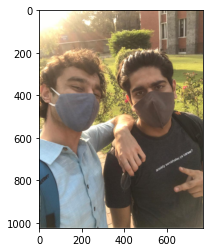

In [ ]:
plt.imshow(content_image);
type(content_image)

In [ ]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)
type(content_image), content_image.shape, content_image.min(), content_image.max()

(numpy.ndarray, (1024, 769, 3), 9.0, 255.0)

In [ ]:
content_image = content_image / 255
content_image.min(), content_image.max()

(0.03529412, 1.0)

In [ ]:
content_image = content_image[tf.newaxis, :]
content_image.shape

(1, 1024, 769, 3)

In [ ]:
style_image = tf.keras.preprocessing.image.load_img('/content/carsilo.jpg')


(1, 560, 600, 3)

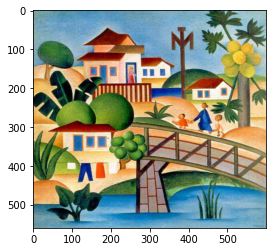

In [ ]:
plt.imshow(style_image);
style_image = tf.keras.preprocessing.image.img_to_array(style_image)
style_image = style_image / 255
style_image = style_image[tf.newaxis, :]
style_image.shape

In [ ]:
style_image = tf.keras.preprocessing.image.load_img('/content/vangogh.jpg')


(1, 810, 1080, 3)

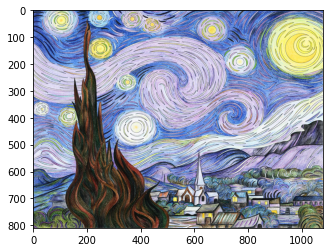

In [ ]:
plt.imshow(style_image);
style_image = tf.keras.preprocessing.image.img_to_array(style_image)
style_image = style_image / 255
style_image = style_image[tf.newaxis, :]
style_image.shape

In [ ]:
content_layers = ['block4_conv2']
style_layers = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
print(len(content_layers),len(style_layers))
print([network.get_layer(name) for name in style_layers[0:2]])
print([network.get_layer(name).output for name in style_layers[0:2]])

1 5
[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0cfcba7850>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f0cfcba7910>]
[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>, <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>]


In [ ]:
def vgg_layers(layers_names):
  vgg = tf.keras.applications.VGG19(include_top=False,weights='imagenet')
  vgg.trainable = False
  outputs1 = [vgg.get_layer(name).output for name in layers_names]
  network = tf.keras.Model(inputs=[vgg.input],outputs=outputs1)
  return network

In [ ]:
extract1 = vgg_layers(style_layers)
extract1.summary()
print(len(extract.layers))

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
style_output1 = extract1(style_image)
print(len(style_output1))
style_output2 = extract1(style_image)
print(len(style_output2))

5
5


In [ ]:
for i in range(0,5):
  print(style_output1[i].shape)
  print(style_output2[i].shape)

(1, 810, 1080, 64)
(1, 810, 1080, 64)
(1, 405, 540, 128)
(1, 405, 540, 128)
(1, 202, 270, 256)
(1, 202, 270, 256)
(1, 101, 135, 512)
(1, 101, 135, 512)
(1, 50, 67, 512)
(1, 50, 67, 512)


In [ ]:
def gram_matrix(layer_activation):
  result = tf.linalg.einsum('bijc,bijd->bcd',layer_activation,layer_activation)
  input_shape = tf.shape(layer_activation)
  num_locations = tf.cast(input_shape[1]*input_shape[2],tf.float32)
  return result/num_locations

In [ ]:
gram_matrix(style_output1[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.78585356, 0.21371658, 0.2652813 , ..., 0.08099107,
         0.3726719 , 0.53593385],
        [0.21371658, 0.1182861 , 0.12005086, ..., 0.01957294,
         0.14615494, 0.18344077],
        [0.2652813 , 0.12005086, 0.13794652, ..., 0.0156966 ,
         0.18381771, 0.23832686],
        ...,
        [0.08099107, 0.01957294, 0.0156966 , ..., 0.06609832,
         0.05267571, 0.05028575],
        [0.3726719 , 0.14615494, 0.18381771, ..., 0.05267571,
         0.3429795 , 0.3935137 ],
        [0.53593385, 0.18344077, 0.23832686, ..., 0.05028575,
         0.3935137 , 0.49909168]]], dtype=float32)>

In [ ]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super().__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    inputs = inputs * 255.0
    # 0 - 1
    # -127.50 - 127.50
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs = outputs[:self.num_style_layers]
    content_outputs = outputs[self.num_style_layers:]

    style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

    content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
    style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

In [ ]:
style_layers, content_layers

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

In [ ]:
results = extractor(content_image)

In [ ]:
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 128, 96, 512), dtype=float32, numpy=
  array([[[[   0.      ,    0.      ,   52.53894 , ...,    0.      ,
             330.8827  ,    0.      ],
           [   0.      ,    0.      ,  226.06134 , ...,    0.      ,
             262.02106 ,    0.      ],
           [   0.      ,    0.      ,  270.0969  , ...,    0.      ,
             423.78397 ,    0.      ],
           ...,
           [ 187.2322  ,    0.      ,    0.      , ...,  289.9828  ,
             287.07007 ,    0.      ],
           [ 344.04666 ,    0.      ,    0.      , ...,    0.      ,
             286.01056 ,    0.      ],
           [ 213.0723  ,  178.4741  ,  140.67802 , ...,    0.      ,
              25.88057 ,  221.22995 ]],
  
          [[   0.      ,    0.      ,    0.      , ...,  614.04675 ,
             102.35036 ,    0.      ],
           [   0.      ,    0.      ,  262.81735 , ...,  215.82988 ,
               0.      ,    0.      ],
           [   0.      ,    

In [ ]:
for key, value in results.items():
  print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [ ]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']
print(len(style_targets), len(content_targets))
new_image = tf.Variable(content_image)
content_weight = 1
style_weight = 100
optimizer = tf.optimizers.Adam(learning_rate=0.02)

5 1


In [ ]:
expected_output = np.array([10000, 15000])
predictions = np.array([8000, 15900])
np.sum(abs(expected_output - predictions)) / 2

1450.0

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(expected_output, predictions)

1450.0

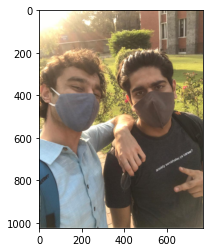

In [ ]:
mean_squared_error(expected_output, predictions)
((expected_output - predictions) ** 2).mean()
plt.imshow(tf.squeeze(content_image, axis = 0));

Epoch 500 | content loss: 723292.0 | style loss: 166613712.0 | total loss 3332997376.0


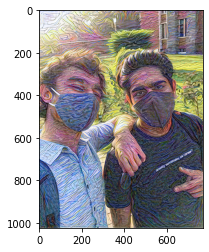

Epoch 1000 | content loss: 737772.1875 | style loss: 70260928.0 | total loss 1405956352.0


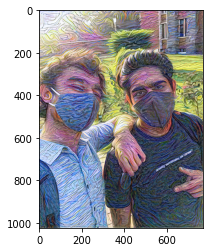

Epoch 1500 | content loss: 745787.9375 | style loss: 44323468.0 | total loss 887215104.0


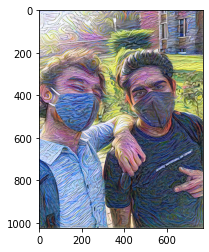

Epoch 2000 | content loss: 749350.3125 | style loss: 35126688.0 | total loss 703283136.0


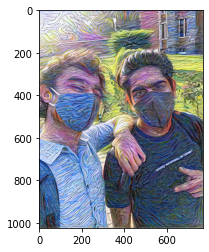

Epoch 2500 | content loss: 755512.9375 | style loss: 33452952.0 | total loss 669814528.0


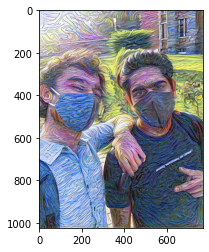

Epoch 3000 | content loss: 756108.5 | style loss: 33358104.0 | total loss 667918144.0


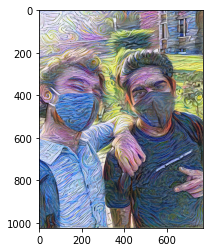

In [ ]:
epochs = 3000
print_every = 500
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

for epoch in range(epochs):
  with tf.GradientTape() as tape:
    outputs = extractor(new_image)

    content_outputs = outputs['content']
    style_outputs = outputs['style']

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])

    total_loss = content_loss * content_weight / num_content_layers + style_loss * style_weight / num_style_layers

  gradient = tape.gradient(total_loss, new_image)
  optimizer.apply_gradients([(gradient, new_image)])

  new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

  if (epoch + 1) % print_every == 0:
    print('Epoch {} | content loss: {} | style loss: {} | total loss {}'.format(epoch + 1, content_loss, style_loss, total_loss))
    plt.imshow(tf.squeeze(new_image, axis = 0))
    plt.show()

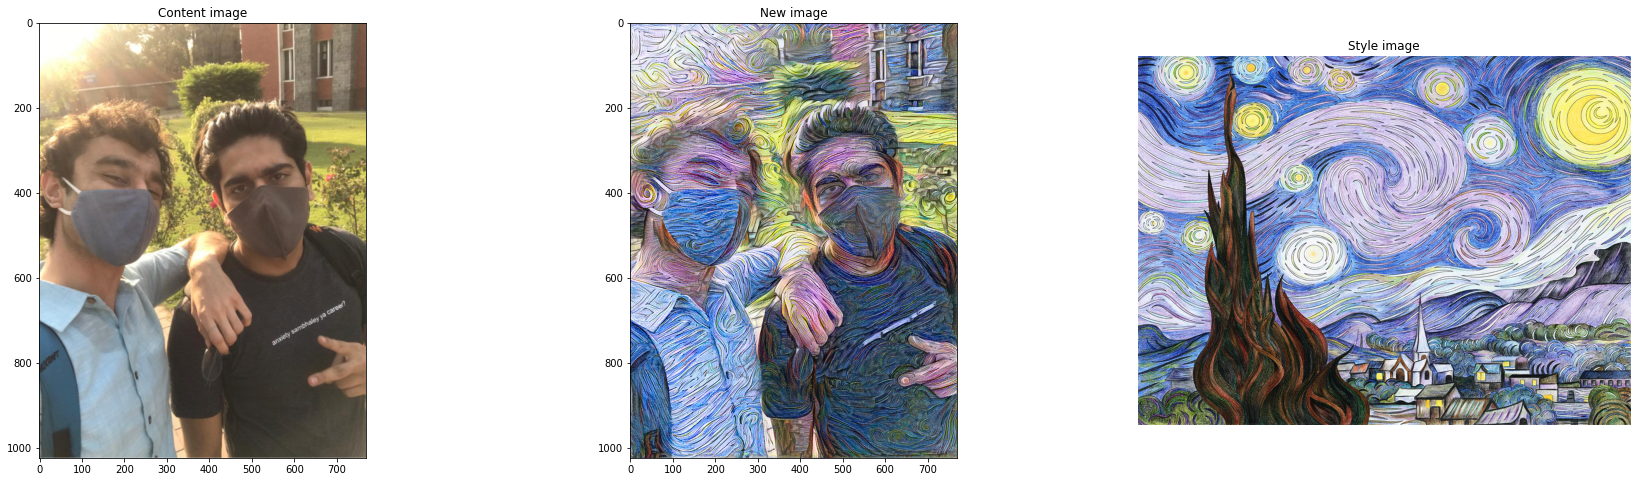

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,8))
ax1.imshow(tf.squeeze(content_image, axis = 0))
ax1.set_title('Content image')
ax2.imshow(tf.squeeze(new_image, axis = 0))
ax2.set_title('New image')
ax3.imshow(tf.squeeze(style_image, axis = 0))
ax3.set_title('Style image')
plt.axis('off');